In [1]:
#### #Data management and manipulation ####
import pandas as pd # import pandas
import numpy as np # import pandas
import random


#### Machine Learning model building/evaluation ###
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
from sklearn.metrics import accuracy_score

In [2]:
path='/Users/carlyfennell/DataScience/data_bootcamp/data/'

# Merge weather to flights

# Merge aggregate traffic to new df

# Merge in David's features

In [3]:
column_types={'mkt_carrier_fl_num': 'float64', 'distance': 'float64', 'month': 'int64', 'day': 'float64', 'wdir': 'float64', 'temp': 'float64', 'visibility': 'float64', 'wspd': 'float64', 'heatindex': 'float64', 'cloudcover': 'float64'}

In [4]:
flights_final=pd.read_csv(path+'flight_final.csv',dtype=column_types)

/opt/anaconda3/envs/bootcamp_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
X=flights_final[['cancelled','mkt_carrier_fl_num','distance', 'month', 'day','origin',
                              'dest', 'wdir', 'temp','visibility', 'wspd', 'heatindex', 'cloudcover','precip',
                              'sealevelpressure', 'humidity', 'wgust','precipcover', 'windchill','total_flights','snowdepth',
                              'branded_code_share','mean_tail_num_arr_delay','mean_carrier_arr_delay','crs_dep_time','crs_arr_time']]


In [6]:
X['snowdepth']=X['snowdepth'].fillna(0)

/opt/anaconda3/envs/bootcamp_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
X[['windchill', 'heatindex','wgust']].median()

windchill    25.7
heatindex    95.0
wgust        44.7
dtype: float64

In [7]:
X['windchill']=X['windchill'].fillna(25.7)
X['heatindex']=X['heatindex'].fillna(95)
X['wgust']=X['wgust'].fillna(44.7)

/opt/anaconda3/envs/bootcamp_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/bootcamp_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/bootcamp_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [8]:
X=X.dropna()

In [9]:
X.shape

(15866077, 26)

In [10]:
flights_final.shape

(15927590, 49)

In [11]:
X=X.sample(n=7000000, random_state=1)

# bin a few vars

# filter and change values

In [16]:
#X_cat=X[list(X.dtypes[X.dtypes=='object'].index)]
#X_num=X[list(X.dtypes[X.dtypes!='object'].index)]

In [12]:
X_cat=X[['origin', 'dest', 'branded_code_share','mkt_carrier_fl_num']]
X_num=X.drop(['origin', 'dest', 'branded_code_share','mkt_carrier_fl_num'],axis=1)

In [13]:
X_cat['branded_code_share'] = pd.factorize(X_cat['branded_code_share'])[0]
X_cat['mkt_carrier_fl_num'] = pd.factorize(X_cat['mkt_carrier_fl_num'])[0]
X_cat['origin'] = pd.factorize(X_cat['origin'])[0]
X_cat['dest'] = pd.factorize(X_cat['dest'])[0]

/opt/anaconda3/envs/bootcamp_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/bootcamp_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/bootcamp_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_num)
X_std=scaler.transform(X_num)

/opt/anaconda3/envs/bootcamp_env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
y=X['cancelled']

In [16]:
y.shape

(7000000,)

In [17]:
X.shape

(7000000, 26)

In [18]:
X_2=pd.concat([X_num,X_cat],axis=1)

In [19]:
###### SPLIT DATA #######
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3,random_state=0) # 70% training and 30% test

In [20]:
X_train['Class']=y_train

/opt/anaconda3/envs/bootcamp_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Optimize Data Set

In [ ]:
X_train.info(memory_usage='deep')

In [ ]:
for dtype in ['float','int','object']:
    selected_dtype = X_train.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

In [ ]:
# We're going to be calculating memory usage a lot,
# so we'll create a function to save us some time!
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [ ]:
### integers
gl_int = X_train.select_dtypes(include=['int'])
converted_int = gl_int.apply(pd.to_numeric,downcast='unsigned')
print(mem_usage(gl_int))
print(mem_usage(converted_int))
compare_ints = pd.concat([gl_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

### floats
gl_float = X_train.select_dtypes(include=['float'])
converted_float = gl_float.apply(pd.to_numeric,downcast='float')
print(mem_usage(gl_float))
print(mem_usage(converted_float))
compare_floats = pd.concat([gl_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

In [ ]:
### Optimize for numeric
optimized_gl = X_train.copy()
optimized_gl[converted_int.columns] = converted_int
optimized_gl[converted_float.columns] = converted_float
print(mem_usage(X_train))
print(mem_usage(optimized_gl))

In [ ]:
gl_obj = X_train.select_dtypes(include=['object']).copy()
gl_obj.describe()

In [ ]:
converted_obj = pd.DataFrame()
for col in gl_obj.columns:
    num_unique_values = len(gl_obj[col].unique())
    num_total_values = len(gl_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = gl_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = gl_obj[col]

In [ ]:
print(mem_usage(gl_obj))
print(mem_usage(converted_obj))
compare_obj = pd.concat([gl_obj.dtypes,converted_obj.dtypes],axis=1)
compare_obj.columns = ['before','after']
compare_obj.apply(pd.Series.value_counts)

In [ ]:
X_train[converted_obj.columns] = converted_obj
mem_usage(X_train)

In [ ]:
dtypes = X_train.dtypes
dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]
column_types = dict(zip(dtypes_col, dtypes_type))
# rather than print all 161 items, we'll
# sample 10 key/value pairs from the dict
# and print it nicely using prettyprint
preview = first2pairs = {key:value for key,value in list(column_types.items())[:10]}
#import pprintpp
#pp = pp = pprint.PrettyPrinter(indent=4)
print(preview)

In [ ]:
column_types={'mkt_carrier_fl_num': 'float64', 'distance': 'float64', 'month': 'int64', 'day': 'float64', 'wdir': 'float64', 'temp': 'float64', 'visibility': 'float64', 'wspd': 'float64', 'heatindex': 'float64', 'cloudcover': 'float64'}

# Check for Imbalance

## try oversampling with resample from sklearn

0.0    4832055
1.0      67945
Name: Class, dtype: int64

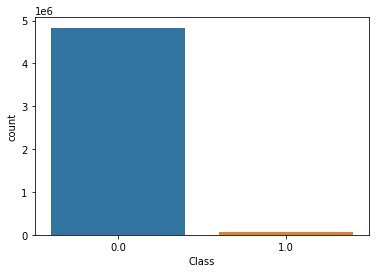

In [22]:
from sklearn.utils import resample
import seaborn as sns
sns.countplot(X_train['Class'])
X_train['Class'].value_counts()

In [23]:
cancelled=X_train[X_train['Class']==1]

In [24]:
# Choose a value for n_samples that will make class 1 even up
# prepare bootstrap sample
boot = resample(cancelled, replace=True, n_samples=4500000, random_state=1)

In [25]:

balanced_data=pd.concat([X_train,boot])
y_bal=balanced_data['Class']
X_bal=balanced_data.drop(['Class'],axis=1)

0.0    4832055
1.0    4567945
Name: Class, dtype: int64

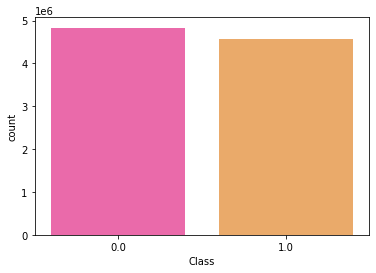

In [41]:
sns.countplot(balanced_data['Class'], palette='spring')
balanced_data['Class'].value_counts()

In [26]:
from sklearn.ensemble import BaggingClassifier
clf_bal = BaggingClassifier(n_estimators=10, random_state=0)

In [27]:
clf_bal.fit(X_bal, y_bal)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=0,
         verbose=0, warm_start=False)

In [28]:
y_pred=clf_bal.predict(X_test)

In [42]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2071174,       0],
       [      0,   28826]])

In [33]:
import matplotlib.pyplot as plt

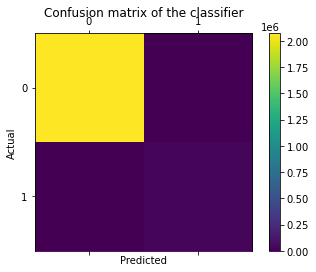



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   2071174
         1.0       1.00      1.00      1.00     28826

   micro avg       1.00      1.00      1.00   2100000
   macro avg       1.00      1.00      1.00   2100000
weighted avg       1.00      1.00      1.00   2100000



In [43]:
from sklearn.metrics import classification_report,confusion_matrix

labels=[0,1]

fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(cnf_matrix)

plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('\n')
print(classification_report(y_test, y_pred))

In [30]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

print ("accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

accuracy:  1.0
Precision: 1.0
Recall: 1.0


# Appendix

Used this tutorial as a starting point

https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/

filter data frame where class==fradulent
filter data frame

492, 284315



In [ ]:
import seaborn as sns
sns.countplot(X_train['Class'])
X_train['Class'].value_counts()

In [39]:
X_train.groupby('Class').count()

,cancelled,distance,month,day,wdir,temp,visibility,wspd,heatindex,cloudcover,...,total_flights,snowdepth,mean_tail_num_arr_delay,mean_carrier_arr_delay,crs_dep_time,crs_arr_time,origin,dest,branded_code_share,mkt_carrier_fl_num
Class,,,,,,,,,,,,,,,,,,,,,
0.0,4832055,4832055,4832055,4832055,4832055,4832055,4832055,4832055,4832055,4832055,...,4832055,4832055,4832055,4832055,4832055,4832055,4832055,4832055,4832055,4832055
1.0,67945,67945,67945,67945,67945,67945,67945,67945,67945,67945,...,67945,67945,67945,67945,67945,67945,67945,67945,67945,67945


### Filter based on label into just fraudulent

In [ ]:
cancelled=X_train[X_train['Class']==1]

### run resampling on the fraudsters

In [ ]:
# prepare bootstrap sample
boot = resample(cancelled, replace=True, n_samples=4000000, random_state=1)

In [38]:
boot.groupby('Class').count()

,cancelled,distance,month,day,wdir,temp,visibility,wspd,heatindex,cloudcover,...,total_flights,snowdepth,mean_tail_num_arr_delay,mean_carrier_arr_delay,crs_dep_time,crs_arr_time,origin,dest,branded_code_share,mkt_carrier_fl_num
Class,,,,,,,,,,,,,,,,,,,,,
1.0,4500000,4500000,4500000,4500000,4500000,4500000,4500000,4500000,4500000,4500000,...,4500000,4500000,4500000,4500000,4500000,4500000,4500000,4500000,4500000,4500000


### Append Bootstrapped fraudulent cases to original X_train

In [ ]:
balanced_data=pd.concat([X_train,boot])

In [40]:
balanced_data.groupby('Class').count()

,cancelled,distance,month,day,wdir,temp,visibility,wspd,heatindex,cloudcover,...,total_flights,snowdepth,mean_tail_num_arr_delay,mean_carrier_arr_delay,crs_dep_time,crs_arr_time,origin,dest,branded_code_share,mkt_carrier_fl_num
Class,,,,,,,,,,,,,,,,,,,,,
0.0,4832055,4832055,4832055,4832055,4832055,4832055,4832055,4832055,4832055,4832055,...,4832055,4832055,4832055,4832055,4832055,4832055,4832055,4832055,4832055,4832055
1.0,4567945,4567945,4567945,4567945,4567945,4567945,4567945,4567945,4567945,4567945,...,4567945,4567945,4567945,4567945,4567945,4567945,4567945,4567945,4567945,4567945


Re-splice off the labels

In [ ]:
y_bal=balanced_data['Class']

In [ ]:
X_bal=balanced_data.drop(['Class'],axis=1)

### Train model with this data set

In [ ]:
from sklearn.ensemble import BaggingClassifier
clf_bal = BaggingClassifier(n_estimators=10, random_state=0)

In [ ]:
X_bal.columns

In [ ]:
X_conca=pd.concat([X_bal,y_bal],axis=1)

In [ ]:
X_conca=X_conca.dropna()

In [ ]:
X_conca.shape

In [ ]:
X_bal.shape

In [ ]:
X_conca.columns

In [ ]:
y_bal=X_conca['Class']

In [ ]:
X_bal=X_conca.drop('Class',axis=1)

In [ ]:
sum(X_bal['mkt_carrier_fl_num'].isnull())

In [ ]:
X_bal=X_bal.drop(['origin','dest','branded_code_share'],axis=1)

In [ ]:
clf_bal.fit(X_bal, y_bal)

In [ ]:
X_test=X_test.drop(['origin','dest','branded_code_share'],axis=1)

In [ ]:
X_test=X_test.dropna()

In [ ]:
X_test.shape

In [ ]:
y_pred=clf_bal.predict(X_test)

In [ ]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
print ("accuracy: ", metrics.accuracy_score(y_test, y_pred_bal_2))
print("Precision:",metrics.precision_score(y_test, y_pred_bal_2))
print("Recall:",metrics.recall_score(y_test, y_pred_bal_2))

In [44]:
X.columns

Index(['cancelled', 'mkt_carrier_fl_num', 'distance', 'month', 'day', 'origin',
       'dest', 'wdir', 'temp', 'visibility', 'wspd', 'heatindex', 'cloudcover',
       'precip', 'sealevelpressure', 'humidity', 'wgust', 'precipcover',
       'windchill', 'total_flights', 'snowdepth', 'branded_code_share',
       'mean_tail_num_arr_delay', 'mean_carrier_arr_delay', 'crs_dep_time',
       'crs_arr_time'],
      dtype='object')

In [48]:
flights_final.columns

Index(['Unnamed: 0', 'fl_date', 'mkt_unique_carrier', 'branded_code_share',
       'mkt_carrier_fl_num', 'tail_num', 'op_carrier_fl_num',
       'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id',
       'dest', 'dest_city_name', 'crs_dep_time', 'dep_delay', 'crs_arr_time',
       'arr_delay', 'cancelled', 'cancellation_code', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'month', 'day', 'wdir', 'temp', 'maxt',
       'visibility', 'wspd', 'heatindex', 'cloudcover', 'mint', 'precip',
       'snowdepth', 'sealevelpressure', 'dew', 'humidity', 'wgust',
       'precipcover', 'windchill', 'closest_airport', 'total_flights',
       'mean_tail_num_arr_delay', 'mean_tail_num_dep_delay',
       'mean_carrier_arr_delay', 'mean_carrier__dep_delay'],
      dtype='object')

In [50]:
flights_final=flights_final.drop('Unnamed: 0',axis=1)

In [ ]:
flights_final[['arr_delay','mkt_unique_carrier']].groupby()

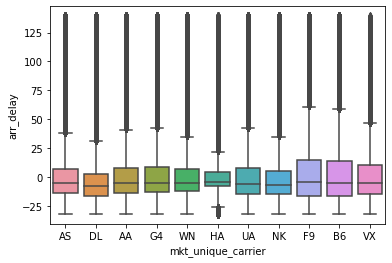

In [53]:
sns.boxplot(x='mkt_unique_carrier',y='arr_delay',data=flights_final[['arr_delay','mkt_unique_carrier']][flights_final['arr_delay'].between(flights_final['arr_delay'].quantile(0.02),
                                               flights_final['arr_delay'].quantile(0.98))])

In [58]:
flights_final[['arr_delay','tail_num']].groupby('tail_num').sum().sort_values(by='arr_delay',ascending=False)

,arr_delay
tail_num,
N11181,84648.0
N13202,84098.0
N33182,82838.0
N14162,81445.0
N11199,78911.0
...,...
N607AS,-15940.0
N987DN,-16347.0
N612AS,-17533.0


In [ ]:
sns.distplot(df_delay[df_delay['dep_delay'].between(df_delay['dep_delay'].quantile(0.02),
                                               df_delay['dep_delay'].quantile(0.98))]['dep_delay']) 


sns.distplot(df_delay[df_delay['weather_delay'].between(df_delay['weather_delay'].quantile(0.02),
                                               df_delay['weather_delay'].quantile(0.98))&df_delay['weather_delay']>0]['weather_delay'])

In [ ]:
X['mean_car']